In [2]:
# day10 of 30-Days-Of-Jupyter
# Today we will see basics of Data Wrangling.

<h2>Table of content</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a href="#identify_handle_missing_values">Identify and handle missing values</a>
        <ul>
            <li><a href="#identify_missing_values">Identify missing values</a></li>
            <li><a href="#deal_missing_values">Deal with missing values</a></li>
            <li><a href="#correct_data_format">Correct data format</a></li>
        </ul>
    </li>
    <li><a href="#data_standardization">Data standardization</a></li>
    <li><a href="#data_normalization">Data Normalization (centering/scaling)</a></li>
    <li><a href="#binning">Binning</a></li>
    <li><a href="#indicator">Indicator variable</a></li>
</ul>
    
</div>
 
<hr>

In [3]:
import pandas as pd
import matplotlib.pylab as plt

In [4]:
csv_data = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df = pd.read_csv(csv_data, names=headers)
df.head()
# Reading the data set from the URL and adding the related headers

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Identify and handle missing values

## Identify Missing Values

In [6]:
# Missing values can be represented as "?","N/A","0" or just a blank cell.
# We can see that normalized-losses have some missing values.
df['normalized-losses']

0        ?
1        ?
2        ?
3      164
4      164
      ... 
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: object

In [7]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
type(missing_data)

pandas.core.frame.DataFrame

#### Convert "?" into "NaN"
In dataset the missing value comes with question-mark "?" we can replace it with NaN (Not a number) which is python default missing marker for reasons of computational speed and convenience. 

In [9]:
import numpy as np
# replace "?" with NaN
df2 = df.replace("?",np.nan,inplace=False)
df2.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Deal with missing data
### How to deal with missing data?
1. Drop Data
   - Drop the missing values when you found missing data.
   - Drop the variable
   - Drop the data Entry   
2. Replace Data
   - Replace it with an average 
   - Replace it with frequency

### Replace Data

#### Replace it with average

In [10]:
# Check the datatype of normalized-losses column which has missing values.
# We can see its a object type but before Replace it with average, we have to convert normalized-losses column into int.
df2.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [11]:
# missing value represnts as True
# select column to convert to list using toList() function
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    205
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    205
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
False    205
Name: fuel-syst

In [12]:
# average for normalized-losses columns
df2[["normalized-losses"]] = df2[["normalized-losses"]].astype("float")

average_normalized = df2["normalized-losses"].mean()
average_normalized

122.0

In [13]:
# replace normalized-losses columns missing value with average value
df2["normalized-losses"].replace(np.nan,average_normalized)

0      122.0
1      122.0
2      122.0
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 205, dtype: float64

#### Replace it with frequency

In [14]:
# To see which values are present in a particular column, we can use the ".value_counts()" method:
df2["num-of-doors"].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [15]:
# We can see four is a most common type in num-of-doors.
# We can also use the ".idxmax()" method to calculate for us the most common type automatically:
df2["num-of-doors"].value_counts().idxmax()

'four'

In [16]:
# replace missing value with the most frequent one
df2["num-of-doors"].replace(np.nan,"four")

0       two
1       two
2       two
3      four
4      four
       ... 
200    four
201    four
202    four
203    four
204    four
Name: num-of-doors, Length: 205, dtype: object

#### Drop the data

In [17]:
# simply drop whole row with NaN in "price" column
df2.dropna(subset=["price"],axis=0,inplace=True)

<h2 id="data_standardization">Data Standardization</h2>
<p>
Data is usually collected from different agencies with different formats.
(Data Standardization is also a term for a particular type of data normalization, where we subtract the mean and divide by the standard deviation)
</p>
    
<b>What is Standardization?</b>
<p>Standardization is the process of transforming data into a common format which allows the researcher to make the meaningful comparison.
</p>

<b>Example</b>
<p>Transform mpg to L/100km:</p>
<p>In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accept the fuel consumption with L/100km standard</p>
<p>We will need to apply <b>data transformation</b> to transform mpg into L/100km?</p>


<p>The formula for unit conversion is<p>
L/100km = 235 / mpg
<p>We can do many mathematical operations directly in Pandas.</p>

In [18]:
df2.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [19]:
# convert mpg into L/100km
df2["city-mpg"] = 235/df2["city-mpg"]

# rename "city-mpg" into "city-L/100km"
df.rename(columns = {"city-mpg" : "city-L/100km"},inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Data Normalization
Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1

Example

To demonstrate normalization, let's say we want to scale the columns "Age" and "Income"

Target:would like to Normalize those variables so their value ranges from 0 to 1.


## Methods For Normalization
   - Simple Feature Scaling
   - Min Max 
   - Z Score

In [20]:
data = {"Age" : [20,30,40],
        "Income" : [100000,2000,50000]
       }
df_data = pd.DataFrame(data)

In [21]:
df_data
# df_data is not-normalized.
# Age and Income are in a different range.
# Hard to compare.

,Age,Income
0,20,100000
1,30,2000
2,40,50000


#### Simple Feature Scaling 

- **replace (original value ) by (original value)/(maximum value).**

In [22]:
# Let's implement Simple Feature Scaling method to normalized the above data.
df_data['Age'] = df_data['Age']/df_data['Age'].max()
df_data['Income'] = df_data['Income']/df_data['Income'].max()
df_data

,Age,Income
0,0.50,1.00
1,0.75,0.02
2,1.00,0.50


#### MIn - Max
- **replace (original value ) by ((original value ) - (minimum value)) / ((maximum value) - (minimum value))**

In [23]:
df_data2 = pd.DataFrame(data)
df_data2

,Age,Income
0,20,100000
1,30,2000
2,40,50000


In [25]:
df_data2['Age'] = (df_data2['Age'] - df_data2['Age'].min()) / (df_data2['Age'].max() - df_data2['Age'].min())

df_data2['Income'] = (df_data2['Income'] - df_data2['Income'].min() / df_data2['Income'].max() - df_data2['Income'].min())

df_data2

,Age,Income
0,0.0,9.800000e+04
1,0.5,2.040817e-07
2,1.0,4.800000e+04


#### Z-Score

# Binning
- Binning means grouping value in bins. Binning can improve accuracy of prediction models.
- Binning can also use to convert numeric into categorical variables.
- Group a set of numerical values into set of "bins"
- For example: You can bin Age from 0-5 ,5-10 and so on.


In [26]:
dataf = pd.DataFrame({'Price': [1000,3000,4000,10000,50000,60000,70000]})
dataf

,Price
0,1000
1,3000
2,4000
3,10000
4,50000
5,60000
6,70000


In [32]:
# Now you we can bin the price value into three categories "low" , "Medium" , "High"
#
import numpy as np 
bins = np.linspace(min(dataf["Price"]),max(dataf["Price"]),4)

group_names = ["Low","Medium","High"]

# cut() function is used to segregate array elements into separate bins
# We apply the function "cut" the determine what each value of "df['Price']" belongs to. 
dataf["Price-binned"] = pd.cut(dataf["Price"], bins, labels=group_names, include_lowest=True)
# include_lowest specifies whether the first interval should be left-inclusive or not.

dataf[['Price','Price-binned']].head(6)

,Price,Price-binned
0,1000,Low
1,3000,Low
2,4000,Low
3,10000,Low
4,50000,High
5,60000,High


In [35]:
dataf["Price-binned"].value_counts()

Low       4
High      3
Medium    0
Name: Price-binned, dtype: int64

Text(0.5, 1.0, 'Price bins')

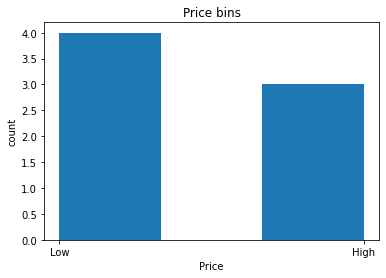

In [38]:
# Let's plot this matplotlib in form of histogram
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(dataf["Price-binned"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("Price")
plt.pyplot.ylabel("count")
plt.pyplot.title("Price bins")

# Indicator variable or dummy variable
An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 

In [39]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-L/100km',
       'highway-mpg', 'price'],
      dtype='object')

In [41]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
